In [8]:
from statsmodels.stats import contingency_tables as conTables
import statsmodels.api as sm
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols as ols_formula
from statsmodels.discrete.discrete_model import Logit as my_logit

In [2]:
europe = np.array([[150,50],[35,100]])
europe

array([[150,  50],
       [ 35, 100]])

In [4]:
#Mcnemar's test
print(conTables.mcnemar(europe, exact=False, correction=False))

pvalue      0.1037416782365415
statistic   2.6470588235294117


In [5]:
child = np.array([[7,10],[1,9]])
child

array([[ 7, 10],
       [ 1,  9]])

In [6]:
sp.stats.fisher_exact(child)

(6.3, 0.18954089388872042)

In [2]:
money = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

liking = np.array([2.2, 2.8, 4.5, 3.1, 8.7, 5.0, 4.5, 8.8, 9.0, 9.2])

In [3]:
np.polyfit(money, liking, 1)

array([0.77818182, 1.5       ])

In [16]:
sp.stats.linregress(money, liking)

LinregressResult(slope=0.7781818181818181, intercept=1.5, rvalue=0.8302539407610453, pvalue=0.002943445862377132, stderr=0.18470585654907157)

In [22]:
X_money = sm.add_constant(money)    #note that you need to add_contant (include intercept) to use statsmodels OLS()

regression_results = sm.OLS(liking, X_money).fit()
regression_results.summary()

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     17.75
Date:                Wed, 12 Sep 2018   Prob (F-statistic):            0.00294
Time:                        10:17:31   Log-Likelihood:                -18.248
No. Observations:                  10   AIC:                             40.50
Df Residuals:                       8   BIC:                             41.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000      1.146      1.309      0.227      -1.143       4.143
x1             0.7782      0.185      4.213      0.003       0.352       1.204
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   2.826
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                0.506
Skew:                           0.537   Prob(JB):                        0.776
Kurtosis:                       3.244   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
residuals = regression_results.resid

Text(0,0.5,'residuals')

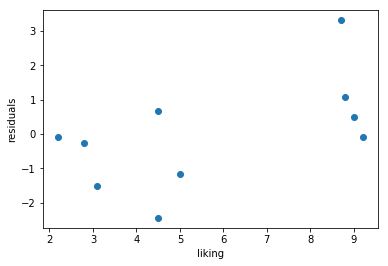

In [33]:
plt.plot(liking, residuals, 'o')
plt.xlabel('liking')
plt.ylabel('residuals')

Text(0,0.5,'residuals')

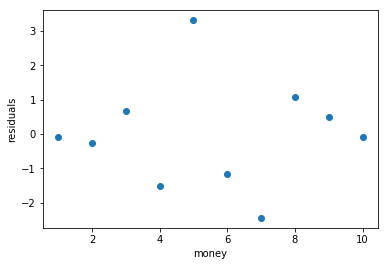

In [34]:
plt.plot(money, residuals, 'o')
plt.xlabel('money')
plt.ylabel('residuals')

(array([1., 1., 1., 1., 2., 2., 1., 0., 0., 1.]),
 array([-2.44727273, -1.87163636, -1.296     , -0.72036364, -0.14472727,
         0.43090909,  1.00654545,  1.58218182,  2.15781818,  2.73345455,
         3.30909091]),
 <a list of 10 Patch objects>)

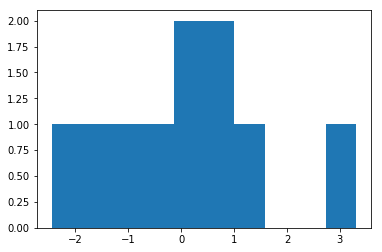

In [35]:
plt.hist(residuals)

In [86]:
#my_df = pd.DataFrame({'a' : [3]})
#np.array([3]).shape
prediction_results = regression_results.get_prediction()
#prediction_results.conf_int(3, alpha=0.05)
prediction_results.summary_frame(3, alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.278182,0.986059,0.004325,4.552039,-2.209295,6.765659
1,3.056364,0.836291,1.127872,4.984855,-1.266379,7.379106
2,3.834545,0.703339,2.212643,5.456448,-0.360403,8.029494
3,4.612727,0.598515,3.232548,5.992906,0.505183,8.720271
4,5.390909,0.538505,4.149113,6.632705,1.327772,9.454046
5,6.169091,0.538505,4.927295,7.410887,2.105954,10.232228
6,6.947273,0.598515,5.567094,8.327452,2.839729,11.054817
7,7.725455,0.703339,6.103552,9.347357,3.530506,11.920403
8,8.503636,0.836291,6.575145,10.432128,4.180894,12.826379
9,9.281818,0.986059,7.007961,11.555675,4.794341,13.769295


#Multiple Regression

In [87]:
money = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

smile = np.array([0.6, 0.7, 1.0, 0.1, 0.3, 0.1, 0.4, 0.8, 0.9, 0.2])

liking = np.array([2.2, 2.8, 4.5, 3.1, 8.7, 5.0, 4.5, 8.8, 9.0, 9.2])

In [89]:
predictors_df = pd.DataFrame({'smile' : smile, 'money' : money})
predictors_df

,smile,money
0,0.6,1
1,0.7,2
2,1.0,3
3,0.1,4
4,0.3,5
5,0.1,6
6,0.4,7
7,0.8,8
8,0.9,9
9,0.2,10


In [92]:


X_predictors = sm.add_constant(predictors_df)    #note that you need to add_contant (include intercept) to use statsmodels OLS()

regression_results = sm.OLS(liking, X_predictors).fit()
regression_results.summary()

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     8.984
Date:                Thu, 13 Sep 2018   Prob (F-statistic):             0.0117
Time:                        14:10:59   Log-Likelihood:                -17.735
No. Observations:                  10   AIC:                             41.47
Df Residuals:                       7   BIC:                             42.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6162      1.545      0.399      0.702      -3.037       4.269
smile          1.4895      1.712      0.870      0.413      -2.559       5.539
money          0.8008      0.189      4.229      0.004       0.353       1.249
==============================================================================
Omnibus:                        9.658   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.971
Skew:                           1.201   Prob(JB):                        0.137
Kurtosis:                       4.939   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
regression_results.rsquared

0.7196303143804057

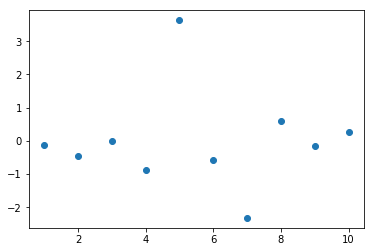

In [97]:
residuals = regression_results.resid

#plt.plot(X_predictors['smile'], residuals, 'o')
plt.plot(X_predictors['money'], residuals, 'o')


In [104]:
residuals / residuals.std(axis = 0)

0   -0.073660
1   -0.306393
2   -0.005321
3   -0.577779
4    2.417938
5   -0.379123
6   -1.542185
7    0.390099
8   -0.108841
9    0.185265
dtype: float64

(array([1., 0., 2., 4., 2., 0., 0., 0., 0., 1.]),
 array([-2.31727718, -1.72223176, -1.12718634, -0.53214092,  0.06290451,
         0.65794993,  1.25299535,  1.84804077,  2.44308619,  3.03813161,
         3.63317703]),
 <a list of 10 Patch objects>)

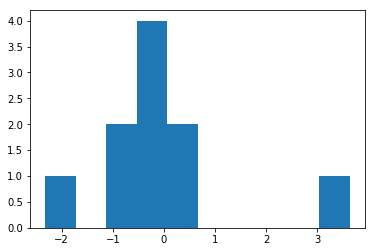

In [105]:
plt.hist(residuals)

In [106]:
from statsmodels.formula.api import ols as ols_formula

In [113]:
talk = np.array([1, 2, 3, 2, 3, 1, 2, 1, 3, 1])

In [114]:
data_df = pd.DataFrame({'smile' : smile, 'money' : money, 'talk' : talk, 'liking' : liking})

In [115]:
data_df

,smile,money,talk,liking
0,0.6,1,1,2.2
1,0.7,2,2,2.8
2,1.0,3,3,4.5
3,0.1,4,2,3.1
4,0.3,5,3,8.7
5,0.1,6,1,5.0
6,0.4,7,2,4.5
7,0.8,8,1,8.8
8,0.9,9,3,9.0
9,0.2,10,1,9.2


In [117]:
fit = ols_formula('liking ~ smile + money', data=data_df).fit() 
fit.summary()

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 liking   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     8.984
Date:                Thu, 13 Sep 2018   Prob (F-statistic):             0.0117
Time:                        15:31:12   Log-Likelihood:                -17.735
No. Observations:                  10   AIC:                             41.47
Df Residuals:                       7   BIC:                             42.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6162      1.545      0.399      0.702      -3.037       4.269
smile          1.4895      1.712      0.870      0.413      -2.559       5.539
money          0.8008      0.189      4.229      0.004       0.353       1.249
==============================================================================
Omnibus:                        9.658   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.971
Skew:                           1.201   Prob(JB):                        0.137
Kurtosis:                       4.939   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
fit = ols_formula('liking ~ smile + money + C(talk)', data=data_df).fit() 
fit.summary()

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 liking   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     8.286
Date:                Thu, 13 Sep 2018   Prob (F-statistic):             0.0197
Time:                        15:34:10   Log-Likelihood:                -13.933
No. Observations:                  10   AIC:                             37.87
Df Residuals:                       5   BIC:                             39.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9694      1.482      1.329      0.241      -1.839       5.778
C(talk)[T.2]    -1.4892      1.100     -1.354      0.234      -4.317       1.338
C(talk)[T.3]     1.5572      1.156      1.347      0.236      -1.414       4.528
smile           -0.1523      1.576     -0.097      0.927      -4.204       3.899
money            0.7033      0.161      4.367      0.007       0.289       1.117
==============================================================================
Omnibus:                        1.715   Durbin-Watson:                   2.982
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.041
Skew:                           0.512   Prob(JB):                        0.594
Kurtosis:                       1.797   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
from statsmodels.discrete.discrete_model import Logit as my_logit

In [121]:
liking = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [126]:
data_df = pd.DataFrame({'smile' : smile, 'money' : money})

In [127]:
X_predictors = sm.add_constant(data_df)    #note that you need to add_contant (include intercept) to use statsmodels OLS()

regression_results = my_logit(liking, X_predictors).fit()
regression_results.summary()

Optimization terminated successfully.
         Current function value: 0.347148
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Sep 2018   Pseudo R-squ.:                  0.4992
Time:                        15:53:52   Log-Likelihood:                -3.4715
converged:                       True   LL-Null:                       -6.9315
                                        LLR p-value:                   0.03143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5794      3.276     -1.398      0.162     -11.001       1.842
smile         -1.4755      3.621     -0.407      0.684      -8.573       5.622
money          0.9312      0.593      1.569      0.117      -0.232       2.094
==============================================================================
"""

In [2]:
f_stat = 10.43
df1 = 3-1
df2 = 48-3

In [4]:
sp.stats.f.cdf(f_stat, df1, df2)

0.9998102015259316

In [20]:
classical_data_string = '226.16771 296.35873 306.83383 546.01098 660.03546 723.85261 184.26730 522.99710 373.47220 448.96608 84.37506 87.22240 253.09995 620.77342 453.90322'
classical_data_parts = classical_data_string.split(' ')
classical_data_parts
song_data = pd.DataFrame({'genre' : 'classical', 'duration' : classical_data_parts})
song_data['duration'] = pd.to_numeric(song_data['duration'])
classical_data = song_data.copy()

In [22]:
hiphop_data_string = '50.23302 215.30077 236.19873 305.50159 299.23220 266.63138 29.88363 344.84200 65.07057 57.20771 217.93914 250.95791 65.30567 229.56363 249.96526 37.61587'
hiphop_data_parts = hiphop_data_string.split(' ')
hiphop_data = pd.DataFrame({'genre' : 'hip-hop', 'duration' : hiphop_data_parts})
hiphop_data['duration'] = pd.to_numeric(hiphop_data['duration'])
song_data = song_data.append(hiphop_data)


In [23]:
sp.stats.shapiro(classical_data['duration'])

(0.9618350863456726, 0.7242573499679565)

In [24]:
sp.stats.shapiro(hiphop_data['duration'])

(0.8602303862571716, 0.019337311387062073)

In [25]:
sp.stats.bartlett(classical_data['duration'], hiphop_data['duration'])

BartlettResult(statistic=4.908182663451749, pvalue=0.026729750378193425)

In [29]:
sp.stats.levene(classical_data['duration'], hiphop_data['duration'])

LeveneResult(statistic=6.1017679899797095, pvalue=0.019629010452812755)

In [30]:
pop_data_string = '246.43873 202.94485 286.90240 225.14893 64.67873 151.64036 235.96363 220.21179 160.23465 251.66322 264.67220 189.49179 196.17914 191.84281 282.22649 180.74077 230.37342'
pop_data_parts = pop_data_string.split(' ')
pop_data = pd.DataFrame({'genre' : 'pop', 'duration' : pop_data_parts})
pop_data['duration'] = pd.to_numeric(pop_data['duration'])



,genre,duration
0,pop,246.43873
1,pop,202.94485
2,pop,286.90240
3,pop,225.14893
4,pop,64.67873
5,pop,151.64036
6,pop,235.96363
7,pop,220.21179
8,pop,160.23465
9,pop,251.66322


In [31]:
song_data = song_data.append(pop_data)


,genre,duration
0,classical,226.16771
1,classical,296.35873
2,classical,306.83383
3,classical,546.01098
4,classical,660.03546
5,classical,723.85261
6,classical,184.26730
7,classical,522.99710
8,classical,373.47220
9,classical,448.96608


In [34]:
song_data = song_data.reset_index(drop=True)

In [41]:
sp.stats.f_oneway(song_data[song_data['genre'] == 'classical']['duration'], song_data[song_data['genre'] == 'hip-hop']['duration'], song_data[song_data['genre'] == 'pop']['duration'])

F_onewayResult(statistic=10.430959139004667, pvalue=0.000189674132473244)

In [40]:
song_data[song_data['genre'] == 'pop']['duration']

31    246.43873
32    202.94485
33    286.90240
34    225.14893
35     64.67873
36    151.64036
37    235.96363
38    220.21179
39    160.23465
40    251.66322
41    264.67220
42    189.49179
43    196.17914
44    191.84281
45    282.22649
46    180.74077
47    230.37342
Name: duration, dtype: float64

In [2]:
from statsmodels.stats import anova as anova
from statsmodels.formula.api import ols

In [51]:

fit = ols('duration ~ genre', data=song_data).fit() 
anova.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
genre,2.0,374225.492075,187112.746037,10.430959,0.00019
Residual,45.0,807219.495300,17938.211007,NaN,NaN


In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairwise_tukeyhsd(song_data['duration'], song_data['genre']).summary()

group1,group2,meandiff,lower,upper,reject
classical,hip-hop,-203.2985,-319.9574,-86.6396,True
classical,pop,-175.2212,-290.2079,-60.2345,True
hip-hop,pop,28.0773,-84.9843,141.1389,False


In [6]:
genre_string = '"classical" "classical" "classical" "classical" "classical" "classical" "classical" "classical" "hip-hop"   "classical" "hip-hop"   "hip-hop" "classical" "pop"       "pop"       "hip-hop"   "pop"       "classical" "pop"       "hip-hop"   "hip-hop"   "pop"       "hip-hop"   "pop"      "pop"       "hip-hop"   "classical" "pop"       "pop"       "hip-hop"  "hip-hop"   "pop"       "pop"       "pop"       "pop"       "classical" "pop"       "pop"       "pop"       "classical" "classical" "hip-hop"  "hip-hop"   "pop"       "hip-hop"   "hip-hop"   "hip-hop"   "hip-hop"'
genre_string = genre_string.replace('"', ' ')
genre_data = genre_string.split()

In [5]:
duration_string = '723.85261 660.03546 620.77342 546.01098 522.99710 453.90322 448.96608 373.47220 344.84200 306.83383 305.50159 299.23220 296.35873 286.90240 282.22649 266.63138 264.67220 253.09995 251.66322 250.95791 249.96526 246.43873 236.19873 235.96363 230.37342 229.56363 226.16771 225.14893 220.21179 217.93914 215.30077 202.94485 196.17914 191.84281 189.49179 184.26730 180.74077 160.23465 151.64036  87.22240  84.37506  65.30567 65.07057  64.67873  57.20771  50.23302  37.61587  29.88363'
duration_data = duration_string.split()

In [9]:
continent_string = 'North America  North America  North America  North America  North America  Europe  Europe  North America  North America  North America  North America  North America  Europe  Europe  Europe  North America  North America  North America  Europe  North America  Europe  Europe  Europe  Europe  Europe  North America  North America  North America  North America  North America  North America  North America  Europe  Europe  Europe  Europe  North America  North America  North America  Europe  Europe  Europe  Europe  North America  Europe  Europe  Europe  Europe'
#continent_string = continent_string.replace('"', ' ')
continent_data = continent_string.split('  ')
continent_data

['North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Europe']

In [ ]:
'North America  North America  North America  North America  North America  Europe  Europe  North America  North America  North America  North America  North America  Europe  Europe  Europe  North America  North America  North America  Europe  North America  Europe  Europe  Europe  Europe  Europe  North America  North America  North America  North America  North America  North America  North America  Europe  Europe  Europe  Europe  North America  North America  North America  Europe  Europe  Europe  Europe  North America  Europe  Europe  Europe  Europe'

In [10]:
song_data = pd.DataFrame({'genre' : genre_data, 'duration' : duration_data, 'continent' : continent_data})
song_data['duration'] = pd.to_numeric(song_data['duration'])
song_data

,genre,duration,continent
0,classical,723.85261,North America
1,classical,660.03546,North America
2,classical,620.77342,North America
3,classical,546.01098,North America
4,classical,522.99710,North America
5,classical,453.90322,Europe
6,classical,448.96608,Europe
7,classical,373.47220,North America
8,hip-hop,344.84200,North America
9,classical,306.83383,North America


In [11]:
fit = ols('duration ~ genre + continent', data=song_data).fit() 
anova.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
genre,2.0,374225.492075,187112.746037,12.061023,0.000067
continent,1.0,124610.652957,124610.652957,8.032226,0.006913
Residual,44.0,682608.842344,15513.837326,NaN,NaN


In [15]:
fit = ols('duration ~ genre + continent', data=song_data).fit() 
anova.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
genre,2.0,374225.492075,187112.746037,12.061023,0.000067
continent,1.0,124610.652957,124610.652957,8.032226,0.006913
Residual,44.0,682608.842344,15513.837326,NaN,NaN


In [17]:
fit = ols('duration ~ genre + continent + genre*continent', data=song_data).fit() 
anova.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
genre,2.0,374225.492075,187112.746037,15.003895,0.000012
continent,1.0,124610.652957,124610.652957,9.992078,0.002916
genre:continent,2.0,158829.157925,79414.578962,6.367968,0.003842
Residual,42.0,523779.684419,12470.944867,NaN,NaN


In [19]:
2 * (1 -sp.stats.binom.cdf(210, 360, 0.5))

0.0012729800620265852

In [20]:
sp.stats.binom_test(210, 360, 0.5)

0.0018340074170964363

In [58]:
wheat_string = '2 3 2 3 4 4 5 3 2 1'
wheat_data = wheat_string.split()
ipa_string = '4 4 3 4 5 5 4 4 3 2'
ipa_data = ipa_string.split()

In [59]:
beer_data = pd.DataFrame({'ipa' : ipa_data, 'wheat' : wheat_data})
beer_data['wheat'] = pd.to_numeric(beer_data['wheat'])
beer_data['ipa'] = pd.to_numeric(beer_data['ipa'])
beer_data

,ipa,wheat
0,4,2
1,4,3
2,3,2
3,4,3
4,5,4
5,5,4
6,4,5
7,4,3
8,3,2
9,2,1


In [61]:
album_rating = np.array([3.5, 4.2, 2.3, 3.0, 1.0])

In [62]:
sp.stats.wilcoxon((album_rating-2), correction = True)

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=2.5, pvalue=0.2228009911811345)

In [35]:
ipa_df = pd.DataFrame({'group' : 'IPA_beer', 'rating' : ipa_data})
wheat_df = pd.DataFrame({'group' : 'wheat_beer', 'rating' : wheat_data})
#wheat_df

,group,rating
0,wheat_beer,2
1,wheat_beer,3
2,wheat_beer,2
3,wheat_beer,3
4,wheat_beer,4
5,wheat_beer,4
6,wheat_beer,5
7,wheat_beer,3
8,wheat_beer,2
9,wheat_beer,1


In [36]:
beer_df = ipa_df.append(wheat_df, ignore_index = True)
beer_df

,group,rating
0,IPA_beer,4
1,IPA_beer,4
2,IPA_beer,3
3,IPA_beer,4
4,IPA_beer,5
5,IPA_beer,5
6,IPA_beer,4
7,IPA_beer,4
8,IPA_beer,3
9,IPA_beer,2


In [37]:
sp.stats.ranksums(beer_data['ipa'], beer_data['wheat'])

RanksumsResult(statistic=1.7008401285415227, pvalue=0.08897301170181328)

In [38]:
amber_string = '2 2 2 3 4 5 3 3 2 2'
amber_data = wheat_string.split()

In [42]:
sp.stats.kruskal(ipa_data, wheat_data, amber_data)

C:\Users\Bakhtiyar\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


KruskalResult(statistic=4.170809659090912, pvalue=0.12425680715560938)

In [48]:
from statsmodels.stats.multicomp import MultiComparison

In [50]:
beer_data['amber'] = amber_data
beer_data

,ipa,wheat,amber
0,4,2,2
1,4,3,3
2,3,2,2
3,4,3,3
4,5,4,4
5,5,4,4
6,4,5,5
7,4,3,3
8,3,2,2
9,2,1,1


In [52]:
education_level_string = '1 2 2 2 3 3 4 5 4 4 3 3 3 2 2 2 3 4 3 2'
education_level_data = education_level_string.split()
consumption_string = '2 2 2 3 4 4 5 4 4 3 2 1 3 4 3 2 4 5 3 1'
consumption_data = consumption_string.split()

In [53]:
beer_data = pd.DataFrame({'education_level' : education_level_data, 'consumption' : consumption_data})
beer_data['education_level'] = pd.to_numeric(beer_data['education_level'])
beer_data['consumption'] = pd.to_numeric(beer_data['consumption'])
beer_data

,education_level,consumption
0,1,2
1,2,2
2,2,2
3,2,3
4,3,4
5,3,4
6,4,5
7,5,4
8,4,4
9,4,3


In [56]:
sp.stats.spearmanr(beer_data['consumption'], beer_data['education_level'])

SpearmanrResult(correlation=0.6092038433381816, pvalue=0.004355681860668939)